In [161]:
library("gvlma")
library("dplyr")
library("ggplot2")
library("tidyverse")
library("glmnet")
library("data.table")
library("repr")
library("viridis")
library("corrplot")

In [162]:
df <- read.csv("datos_temprt.csv")
str(df)

'data.frame':	108464 obs. of  15 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 $ Cruise     : Factor w/ 180 levels "99-0           ",..: 29 29 29 29 29 29 29 29 29 29 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Day        : int  15 15 15 15 15 15 15 15 15 15 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Year       : int  1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 ...
 $ Institute  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Instrument : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Device     : Factor w/ 5 levels "CTD","MBT","OSD",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Sospechoso : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...


In [230]:
dfT <- fread("datos_temprt.csv", select = c("Temperature", "Ts", "Depth", "Latitude", "Longitude", "Month",  "Cast"))
str(dfT)
summary(dfT)

Classes 'data.table' and 'data.frame':	108464 obs. of  7 variables:
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 - attr(*, ".internal.selfref")=<externalptr> 


  Temperature          Ts             Depth           Latitude    
 Min.   :-2.24   Min.   : 9.176   Min.   :   0.0   Min.   :18.20  
 1st Qu.: 9.24   1st Qu.:19.063   1st Qu.: 118.4   1st Qu.:21.01  
 Median :14.68   Median :20.375   Median : 290.3   Median :22.18  
 Mean   :15.79   Mean   :21.389   Mean   : 351.0   Mean   :21.88  
 3rd Qu.:22.32   3rd Qu.:23.615   3rd Qu.: 508.0   3rd Qu.:23.07  
 Max.   :31.50   Max.   :30.162   Max.   :1990.8   Max.   :23.55  
   Longitude          Month             Cast         
 Min.   :-87.55   Min.   : 1.000   Min.   : 2702452  
 1st Qu.:-86.62   1st Qu.: 5.000   1st Qu.: 3078053  
 Median :-86.35   Median : 7.000   Median : 7332785  
 Mean   :-86.39   Mean   : 7.362   Mean   : 8233858  
 3rd Qu.:-86.11   3rd Qu.:11.000   3rd Qu.:10302115  
 Max.   :-85.88   Max.   :12.000   Max.   :18900411  

In [176]:
#Matriz de correlación  
dfcorr <-cor(dfT)

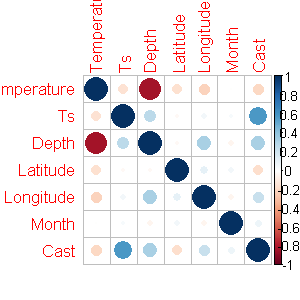

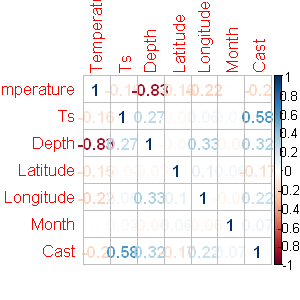

In [179]:
#Grafica de correlación
corrplot(dfcorr, method="circle")
corrplot(dfcorr, method="number")

In [237]:
summary(dfT$Temperature)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -2.24    9.24   14.68   15.79   22.32   31.50 

In [250]:
cast<- length(unique(df$Cast))
#tamcast <- length(cast)
cast

[1] 1168

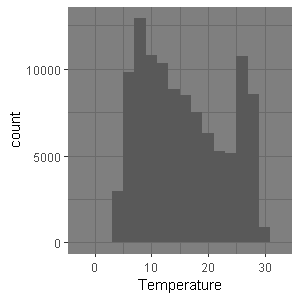

In [233]:
ggplot(data = dfT) +
  geom_histogram(mapping = aes(x = Temperature), binwidth = 2) + theme_dark()

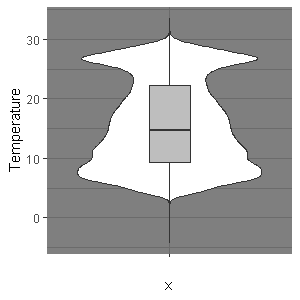

In [240]:
vp <- ggplot( dfT, aes(group = TRUE, x = "", y = Temperature)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

### Temperatura Superficial

In [165]:
summary(dfT$Ts)
c("Correlación entre variable de respuesta", cor(dfT$Temperature, dfT$Ts))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.176  19.063  20.375  21.389  23.615  30.162 

[1] "Correlación entre variable de respuesta"
[2] "-0.155521304456749"

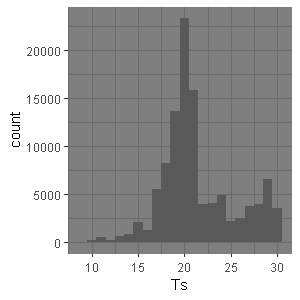

In [166]:
options(repr.plot.width= 3, repr.plot.height= 3, repr.plot.res = 100)
ggplot(data = dfT) +
  geom_histogram(mapping = aes(x = Ts), binwidth = 1) + theme_dark()

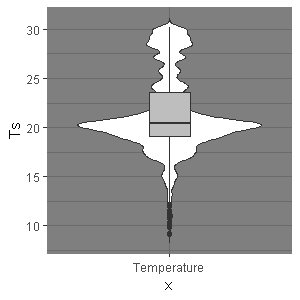

In [244]:
vp <- ggplot( dfT, aes(group = TRUE, x = "Temperature", y = Ts)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


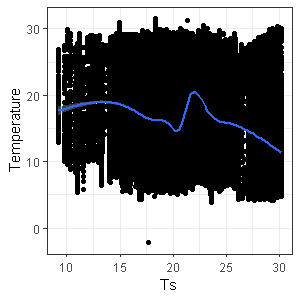

In [168]:
ggplot(data = dfT, mapping = aes(Ts, Temperature)) + geom_point() + geom_smooth() + theme_bw()

### Variable predictora Depth

In [185]:
cat("Resumen estadístico de variable predictora")
summary(dfT$Depth)
cat("Correlación de variable predictora Depth con variable de respuesta")
cor(dfT$Depth, dfT$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   118.4   290.3   351.0   508.0  1990.8 

Correlación de variable predictora Depth con variable de respuesta

[1] -0.8321313

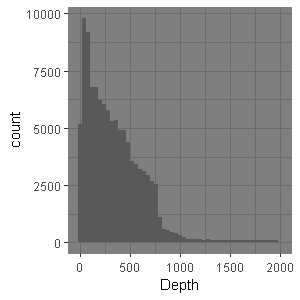

In [170]:
options(repr.plot.width= 3, repr.plot.height= 3, repr.plot.res = 100)
ggplot(data = dfT) + geom_histogram(mapping = aes(x = Depth), binwidth = 40) + theme_dark()

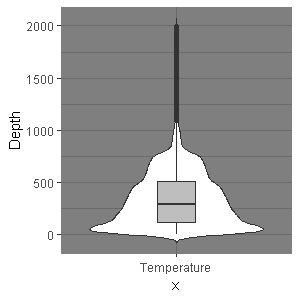

In [245]:
vp <- ggplot( dfT, aes(group = TRUE, x = "Temperature", y = Depth)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


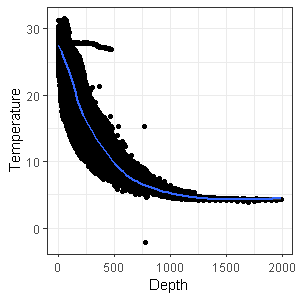

In [172]:
ggplot(data = dfT, mapping = aes(Depth, Temperature)) + geom_point() + geom_smooth() + theme_bw()

### Variable predictora Latitude

In [188]:
cat("Resumen estadístico de variable predictora")
summary(dfT$Latitude)
cat("Correlación de variable predictora Latitude con variable de respuesta")
cor(dfT$Latitude, dfT$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.20   21.01   22.18   21.88   23.07   23.55 

Correlación de variable predictora Latitude con variable de respuesta

[1] -0.1630934

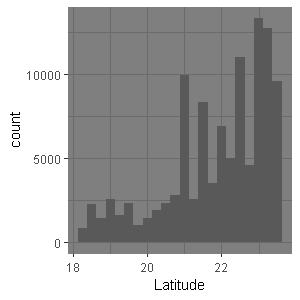

In [193]:
ggplot(data = dfT) + geom_histogram(mapping = aes(x = Latitude), binwidth = 0.25) + theme_dark()

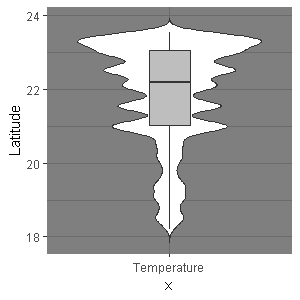

In [246]:
vp <- ggplot( dfT, aes(group = TRUE, x = "Temperature", y = Latitude)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


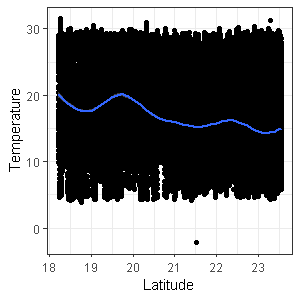

In [175]:
ggplot(data = dfT, mapping = aes(Latitude, Temperature)) + geom_point() + geom_smooth() + theme_bw()

### Variable predictora Longitude

La primera variable es la longitud. Esta variable tiene una correlación muy baja respecto a la temperatura. Además, la distribución de la variable se encuentra sesgada. El boxplot nos permite visualizar que la variable contiene datos atípicos.


In [195]:
cat("Resumen estadístico de variable predictora")
summary(dfT$Longitude)
cat("Correlación de variable predictora Longitud con variable de respuesta")
cor(dfT$Longitude, dfT$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -87.55  -86.62  -86.35  -86.39  -86.11  -85.88 

Correlación de variable predictora Longitud con variable de respuesta

[1] -0.2218469

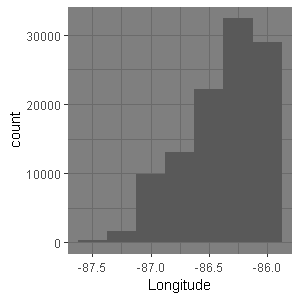

In [202]:
ggplot(data = dfT) + geom_histogram(mapping = aes(x = Longitude), binwidth = 0.25) + theme_dark()

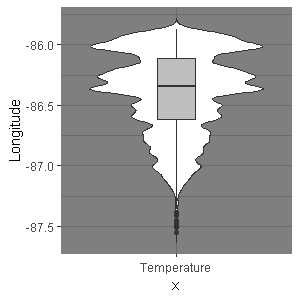

In [247]:
vp <- ggplot( dfT, aes(group = TRUE, x = "Temperature", y = Longitude)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


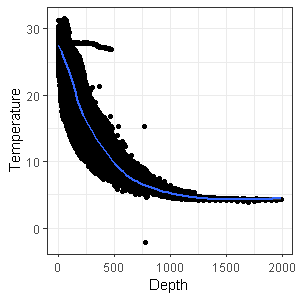

In [198]:
ggplot(data = dfT, mapping = aes(Depth, Temperature)) + geom_point() + geom_smooth() + theme_bw()

### Variable predictora Month

In [203]:
cat("Resumen estadístico de variable predictora")
summary(dfT$Longitude)
cat("Correlación de variable predictora Month con variable de respuesta")
cor(dfT$Month, dfT$Temperature)

Resumen estadístico de variable predictora

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -87.55  -86.62  -86.35  -86.39  -86.11  -85.88 

Correlación de variable predictora Month con variable de respuesta

[1] -0.003338407

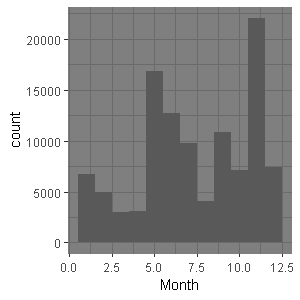

In [213]:
ggplot(data = dfT) + geom_histogram(mapping = aes(x = Month), binwidth = 1) + theme_dark()

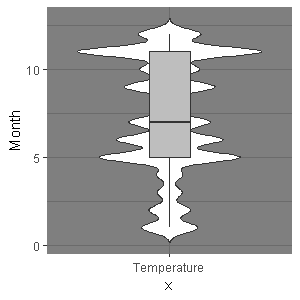

In [248]:
vp <- ggplot( dfT, aes(group = TRUE, x = "Temperature", y = Month)) + 
    geom_violin(trim = FALSE)+
    geom_boxplot( width = 0.2, fill = "grey")+ theme_dark()
vp

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


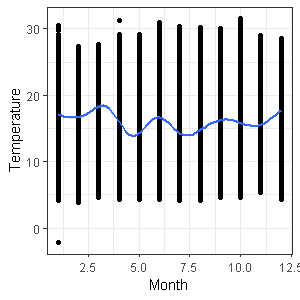

In [215]:
ggplot(data = dfT, mapping = aes(Month, Temperature)) + geom_point() + geom_smooth() + theme_bw()

#### Separamos muestras aleatorias de los datos para poder aplicar validación cruzada

In [251]:
casts <- dfT %>% group_by(Cast) %>% tally(sort = TRUE) %>% pull(Cast)


In [252]:
# Separación de datos de entrenamiento y de prueba para validación cruzada
train <- casts[1:as.integer(length(casts) * 0.6)]
test <- casts[as.integer((length(casts) * 0.6) + 1):as.integer((length(casts) * 0.8))]
validation <- casts[as.integer((length(casts) * 0.8) + 1):length(casts)]

df_train <- dfT[Cast %in% train]
df_test <- dfT[Cast %in% test]
df_validation <- dfT[Cast %in% validation]

In [259]:
err_test <- c()
deg <- c()
for(poli in 1:10){

  mlr_poli2 <- lm(Trans.Temp(Temperature) ~ Longitude + poly(Latitude, poli, raw = T)  + Trans.Z(Z) + Longitude*Latitude + Latitude*Z + Longitude*Latitude*Z + m + ts, data = df_train)
  test_pred <- predict(mlr_poli2, df_test)
  err <- sum(test_pred - df_test$Temperature)^2  
  err_test <- c(err_test, err)
  deg <- c(deg, poli)
}
plot(deg, err_test, type = "l", xlab = "Grado", ylab = "Error de prueba", main="Validación cruzada para el polinomio de Y")
c("Grados con menor error", order(err_test)[1:3])
Lat_pol <- function(Latitude) { return(poly(Latitude, 6, raw = T)) }
mlr_poli2 <- lm(Trans.Temp(Temperature) ~ Longitude + Lat_pol(Latitude)  + Trans.Z(Z) + Longitude*Latitude + Latitude*Z + Longitude*Latitude*Z + m + ts, data = df_train)
summary(mlr_poli2)

ERROR: Error in Trans.Z(Z): no se pudo encontrar la función "Trans.Z"


La primera transformación se aplica sobre la temperatura. Como el modelo presenta heterocedasticidad, entonces aplicamos la ráiz a los datos de la temperatura, restando el valor mínimo a cada observación para eliminar los datos negativos y no tener raíces imaginarias.

In [229]:


## Con esta transformación, logramos subir la r-cuadrada a 0.7882.

# Primera transformación: Raíz de Temperatura (Para la heterocedasticidad)
Trans.Temp <- function(Temperature) { return (sqrt(Temperature - min(Temperature))) }
reg <- lm(Trans.Temp(Temperature) ~ Ts + Depth + Latitude + Longitude + Month, data = dfT)
summary(reg)


Call:
lm(formula = Trans.Temp(Temperature) ~ Ts + Depth + Latitude + 
    Longitude + Month, data = dfT)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.14968 -0.29402 -0.05738  0.25471  2.79267 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.687e+01  3.384e-01   79.39   <2e-16 ***
Ts           1.263e-02  3.180e-04   39.70   <2e-16 ***
Depth       -2.686e-03  4.508e-06 -595.95   <2e-16 ***
Latitude    -1.151e-01  9.051e-04 -127.16   <2e-16 ***
Longitude    2.252e-01  3.879e-03   58.05   <2e-16 ***
Month       -9.340e-03  3.790e-04  -24.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4053 on 108458 degrees of freedom
Multiple R-squared:  0.7885,	Adjusted R-squared:  0.7884 
F-statistic: 8.085e+04 on 5 and 108458 DF,  p-value: < 2.2e-16


In [227]:
summary(dfT)

  Temperature          Ts             Depth           Latitude    
 Min.   :-2.24   Min.   : 9.176   Min.   :   0.0   Min.   :18.20  
 1st Qu.: 9.24   1st Qu.:19.063   1st Qu.: 118.4   1st Qu.:21.01  
 Median :14.68   Median :20.375   Median : 290.3   Median :22.18  
 Mean   :15.79   Mean   :21.389   Mean   : 351.0   Mean   :21.88  
 3rd Qu.:22.32   3rd Qu.:23.615   3rd Qu.: 508.0   3rd Qu.:23.07  
 Max.   :31.50   Max.   :30.162   Max.   :1990.8   Max.   :23.55  
   Longitude          Month             Cast         
 Min.   :-87.55   Min.   : 1.000   Min.   : 2702452  
 1st Qu.:-86.62   1st Qu.: 5.000   1st Qu.: 3078053  
 Median :-86.35   Median : 7.000   Median : 7332785  
 Mean   :-86.39   Mean   : 7.362   Mean   : 8233858  
 3rd Qu.:-86.11   3rd Qu.:11.000   3rd Qu.:10302115  
 Max.   :-85.88   Max.   :12.000   Max.   :18900411  

### Falta hacer para las demás variables y describir lo que se ve en las gráficas.

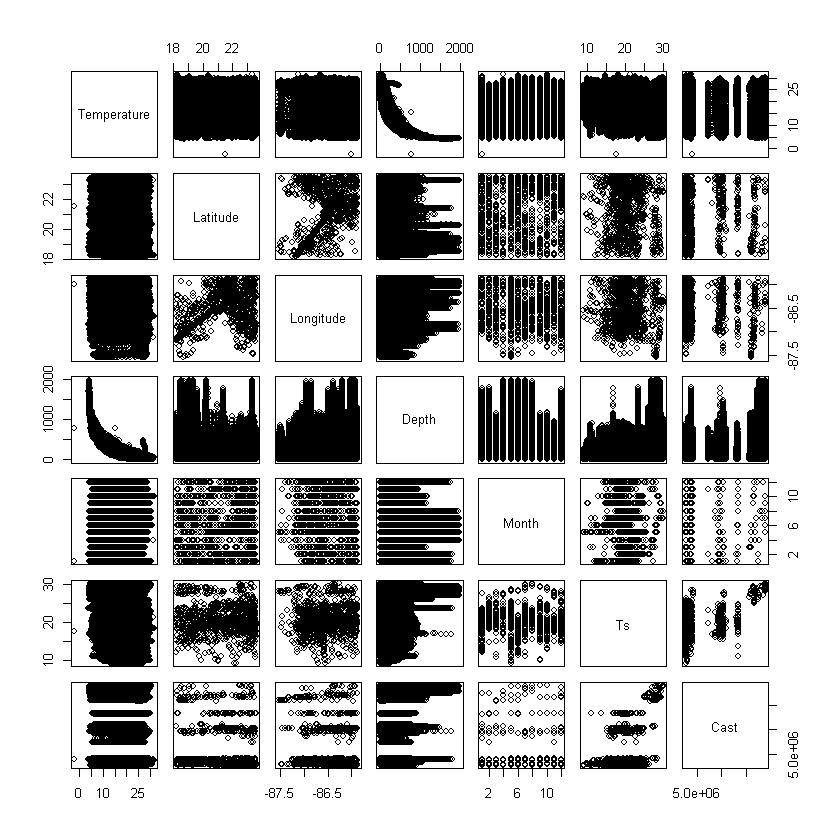

In [29]:
pairs(dfT)

### Se visualizan los cast respecto a las temperaturas tomadas en ese mismo registro

In [115]:
head(unique(dfT$Cast))

[1]  3678873  3679613  3679603  3681827  3681828 10268672

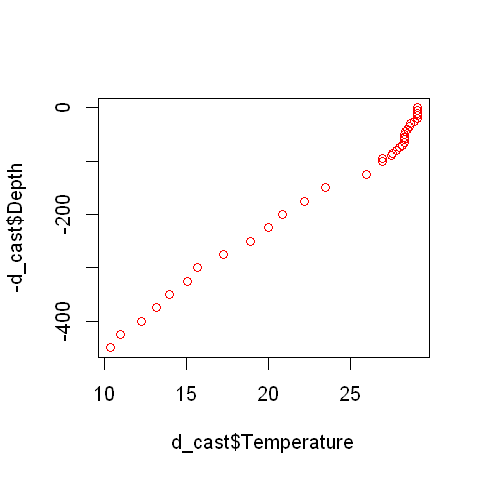

In [94]:
d_cast <- dfT[dfT$Cast == 3678873, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

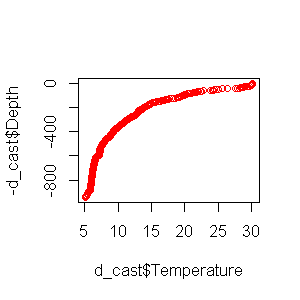

In [257]:
d_cast <- dfT[dfT$Cast == 18872763, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

In [113]:
str(dfT)

Classes 'data.table' and 'data.frame':	108464 obs. of  7 variables:
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 - attr(*, ".internal.selfref")=<externalptr> 


### Modelado estadístico 

Se aplica la regresión lineal múltiple sin transformaciones a las variables predictoras:


Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8985 -2.7628 -0.7294  2.3352 24.0693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.029e+02  3.141e+00   64.60   <2e-16 ***
Ts           1.309e-01  2.952e-03   44.36   <2e-16 ***
Depth       -2.179e-02  4.184e-05 -520.86   <2e-16 ***
Latitude    -1.050e+00  8.401e-03 -125.02   <2e-16 ***
Longitude    1.836e+00  3.601e-02   51.00   <2e-16 ***
Month       -8.754e-02  3.518e-03  -24.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.762 on 108458 degrees of freedom
Multiple R-squared:  0.7404,	Adjusted R-squared:  0.7404 
F-statistic: 6.187e+04 on 5 and 108458 DF,  p-value: < 2.2e-16


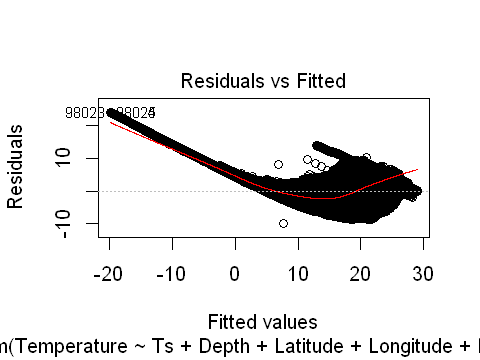

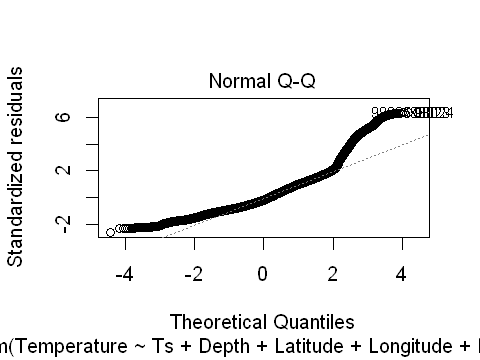

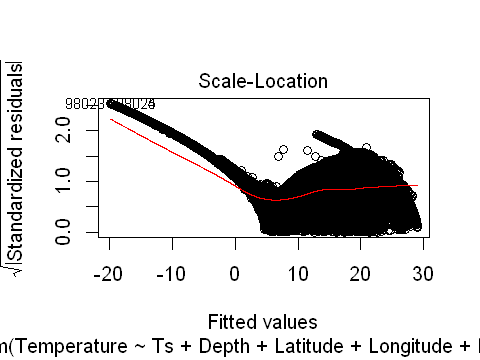

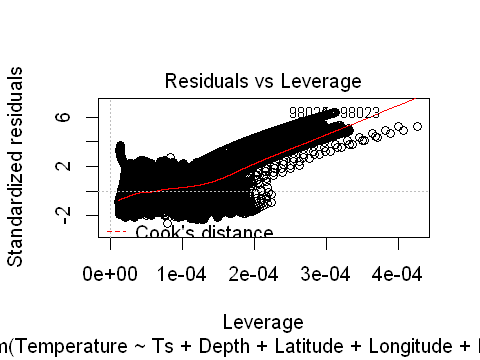

In [114]:
reg <- lm(Temperature ~ Ts + Depth + Latitude + Longitude  + Month , data = dfT)
summary(reg)
plot(reg)

## Regresión lineal multiple sin modificar variables (Explicar las gráficas...)


Call:
lm(formula = Temperature ~ Ts + Depth + Latitude * Longitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8601 -2.7481 -0.7215  2.3221 23.8815 

Coefficients:
                     Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        -9.993e+01  3.929e+01   -2.543 0.010988 *  
Ts                  1.323e-01  2.956e-03   44.756  < 2e-16 ***
Depth              -2.175e-02  4.226e-05 -514.568  < 2e-16 ***
Latitude            1.289e+01  1.804e+00    7.149 8.78e-13 ***
Longitude          -1.662e+00  4.539e-01   -3.661 0.000251 ***
Month              -8.370e-02  3.552e-03  -23.567  < 2e-16 ***
Latitude:Longitude  1.611e-01  2.084e-02    7.732 1.07e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.761 on 108457 degrees of freedom
Multiple R-squared:  0.7405,	Adjusted R-squared:  0.7405 
F-statistic: 5.159e+04 on 6 and 108457 DF,  p-value: < 2.2e-16


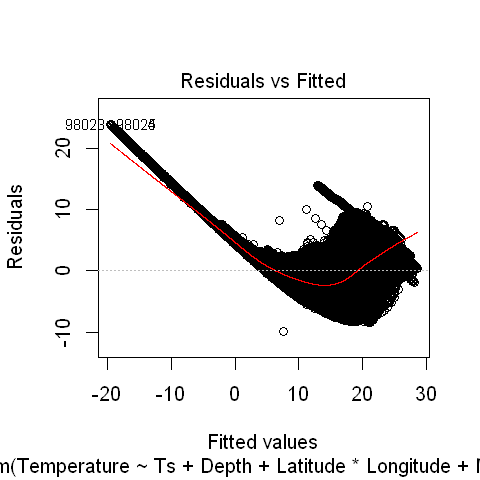

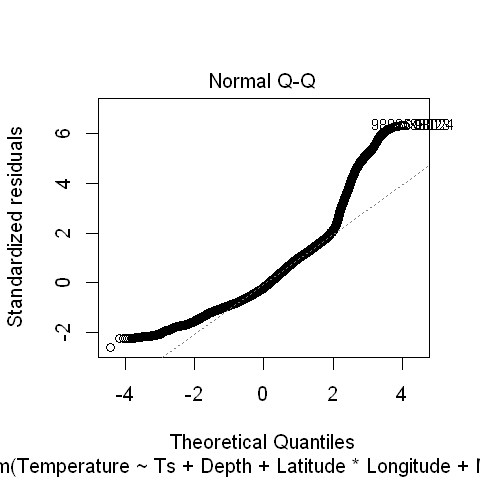

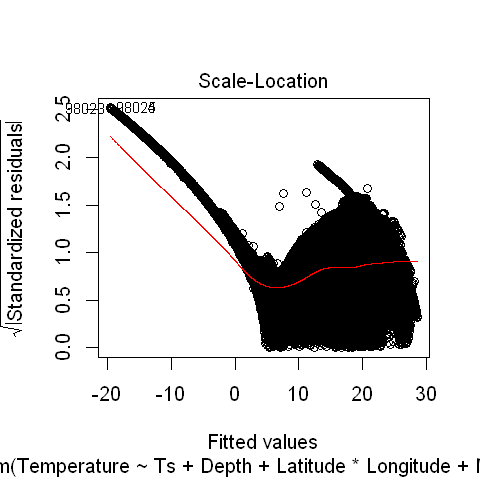

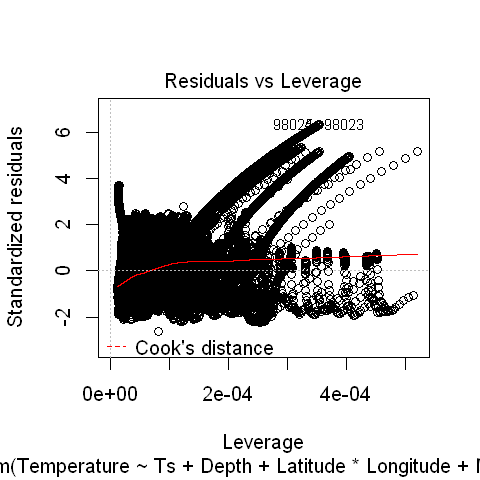

In [123]:
reg <- lm(Temperature ~ Ts + Depth + Latitude*Longitude  + Month , data = dfT)
summary(reg)
plot(reg)

# Sugerencias

* Considera explorar transformaciones polinomiales para la profundidad (variable $Depth$)
* Los polinomios de profundidad pueden depender de la latitud o de la longitud, por lo tanto, es recomendable que el modelo tenga términos de interacción entre las coordenadas geográficas y la profundidad.
* Determina la complejidad del modelo mediante validación cruzada (k-fold cross validation)
* Para la validación, puedes utilizar librerías especializadas de R: https://quantdev.ssri.psu.edu/tutorials/cross-validation-tutorial

base de datos con las variables de interés para el estudio, algunas de ellas fueron: 1) La temperatura que registró el dispositivo expresada en grados Celsius 2) La profundidad a la cual se tomó la medición expresada en metros, 3) La latitud y la longitud expresadas en el sistema de coordenadas geográficas WGS84, 4) La fecha de la medición (día, mes y año), 5) Tipo de instrumento de medición y  6) El promedio mensual de la temperatura superficial.